### 모델 선언, 학습, 구조를 살펴 보자

1.모델의 속성값 , 내부 연산을 이해하고 설명할 수 있다.  
2.단층 퍼셉트론, 다층 퍼셉트론을 이해하고 설명할 수 있다.  
3.손실함수,최적화함수를 이해하고 접목할 수 있다.  
4.텐서생성 및 연산을 통해 모델의 실행 및 매개인자 구현을 이해할 수 있다  

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers  import  Dense,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses  import mse

### Q1) 입력레이어 3, 출력 레이어 2인 단층 신경망을 작성해보자

In [2]:
model =  Sequential()

#3개의 입력 , 2개의 출력
model.add(Dense(2,input_dim=3 , activation='softmax')) #출력이 2개 2진 분류했다

In [3]:
#모델에 대한 모든 매개변수(가중치 W, 편향 b)의 개수를 확인해보자 -> summary()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Q2
입력층 : 4개의 입력 , 8개 출력  
히든1 : 8개의 입력 , 8개 출력 relu  
히든2 : 8개의 입력 , 3개 출력 relu  
입력층 : 3개의 입력 , 3개 출력 softmax  

In [4]:
model =  Sequential()

#4개의 입력 , 8개의 출력
model.add(Dense(8,input_dim=4 , activation='relu')) #4개를 입력 8개 출력 (4*8) + 8 = 40
model.add(Dense(8, activation='relu')) # 8개를 입력 8개 출력 (8*8) + 8 = 72
model.add(Dense(3, activation='softmax')) # 8개 입력 3개 출력 (8*3)+3 = 27
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Q3 과적합 방지를 활용한 Dropout을 구현해보자.
학습과정에서 임의 뉴런을 제거 0~1사이의 비율로 적용

In [5]:
model =  Sequential()
model.add(Dense(8,input_dim=4 , activation='relu'))
model.add(Dropout(0.2)) # 첫번째 은닉충 뒤에 드랍아웃을 추가 , 20% 비율로 뉴런을 제거한다

model.add(Dense(8, activation='relu')) 
model.add(Dropout(0.2)) # 두번째 은닉충 뒤에 드랍아웃을 추가 , 20% 비율로 뉴런을 제거한다

model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Q4 Q3의 코드를 모델 선언과 동시에 레이어 지정을 해보자

In [6]:
model =  Sequential([Dense(8,input_dim=4 , activation='relu' , name ='dense_1'),
                     Dropout(0.2 , name ='dropout_1'),
                     Dense(8, activation='relu', name ='dense_2') ,
                     Dropout(0.2, name ='dropout_2'),
                     Dense(3, activation='softmax', name ='dense_output')
                    ])

model.summary()

#모든 레이어의 목록을 출력
for layer in model.layers:
    #print(f'layer : {layer}')
    if hasattr(layer,'input_shape'):
        print(f'input_shape : {layer.input_shape}')
    if hasattr(layer,'output_shape'):
        print(f'input_shape : {layer.output_shape}')
    if hasattr(layer,'activation'):
        print(f'input_shape : {layer.activation.__name__}')
    print('-'*30)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_output (Dense)        (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
input_shape : (N

In [7]:
for layer in model.layers:
     layer_info = [
      f'layer.name:  {layer.name}',
      f"Input Shape: {getattr(layer,'input_shape','N/A')}",
      f"output Shape:{getattr(layer,'output_shape','N/A')}",
      f"Activation: {getattr(layer.activation,'__name','N/A') if hasattr(layer,'activation') else 'N/A'}",
     ]
     print('|'.join(layer_info))

layer.name:  dense_1|Input Shape: (None, 4)|output Shape:(None, 8)|Activation: N/A
layer.name:  dropout_1|Input Shape: (None, 8)|output Shape:(None, 8)|Activation: N/A
layer.name:  dense_2|Input Shape: (None, 8)|output Shape:(None, 8)|Activation: N/A
layer.name:  dropout_2|Input Shape: (None, 8)|output Shape:(None, 8)|Activation: N/A
layer.name:  dense_output|Input Shape: (None, 8)|output Shape:(None, 3)|Activation: N/A


In [8]:
for layer in model.layers:
    if hasattr(layer,'get_weights') and len(layer.get_weights()) > 0 :
        w,b = layer.get_weights()
        print(f'w:\n {w}')
        print(f'b:\n {b}')

w:
 [[ 0.27062643 -0.48211947 -0.5810479   0.05391544 -0.01001257 -0.57448006
   0.4542877  -0.03671479]
 [-0.13151419  0.4077571  -0.25520742  0.43103963 -0.45621705 -0.3496312
   0.6607979  -0.15567106]
 [ 0.04896754  0.539558    0.5791469   0.38618094  0.4777438   0.45702797
   0.0035243   0.4670766 ]
 [ 0.3212363  -0.16288948  0.33510298 -0.0948621  -0.35661256  0.11215228
   0.21119481  0.01835781]]
b:
 [0. 0. 0. 0. 0. 0. 0. 0.]
w:
 [[ 0.40538675  0.0700444   0.4129396   0.5293438  -0.56995887  0.01185763
   0.13032997 -0.09723151]
 [-0.11047775 -0.1335189  -0.12292799 -0.06050014  0.0851844   0.45992452
   0.29599112 -0.6011644 ]
 [ 0.20060986  0.53646964 -0.35335243 -0.23599201 -0.1063925   0.12406009
   0.03049988 -0.07270014]
 [ 0.60286146  0.27933633 -0.09984231  0.3456865   0.268215   -0.49534917
   0.59674317  0.4052512 ]
 [ 0.09249294 -0.07317162  0.14630449  0.01099652  0.03188312 -0.539601
  -0.51558214 -0.01419258]
 [-0.39189625  0.55637056 -0.5403636   0.5560364  -0.56

In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers  import  Dense,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses  import mse
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

### 데이터 로드 및 전처리 -> 모델 생성 -> 모델 컴파일 -> 모델 학습 -> 학습 결과 및 평가

C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Epoch 1/300


9/9 [==============================] - 2s 36ms/step - loss: 1.1050 - accuracy: 0.3034 - val_loss: 0.8209 - val_accuracy: 0.4783
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 0.9451 - accuracy: 0.3034 - val_loss: 0.7335 - val_accuracy: 0.4783
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8315 - accuracy: 0.3034 - val_loss: 0.6838 - val_accuracy: 0.4783
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7564 - accuracy: 0.3258 - val_loss: 0.6445 - val_accuracy: 0.5217
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6996 - accuracy: 0.4045 - val_loss: 0.5994 - val_accuracy: 0.7826
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6475 - accuracy: 0.7978 - val_loss: 0.5605 - val_accuracy: 0.9565
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5968 - accuracy: 0.8652 - val_loss: 0.5118 - val_accuracy: 0.9565
Epoch 8/300
9/9 [======

9/9 [==============================] - 0s 6ms/step - loss: 0.1272 - accuracy: 0.9663 - val_loss: 0.0766 - val_accuracy: 1.0000
Epoch 55/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1252 - accuracy: 0.9663 - val_loss: 0.0721 - val_accuracy: 1.0000
Epoch 56/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1256 - accuracy: 0.9775 - val_loss: 0.0642 - val_accuracy: 1.0000
Epoch 57/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1233 - accuracy: 0.9663 - val_loss: 0.0719 - val_accuracy: 1.0000
Epoch 58/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1222 - accuracy: 0.9663 - val_loss: 0.0748 - val_accuracy: 1.0000
Epoch 59/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1209 - accuracy: 0.9663 - val_loss: 0.0680 - val_accuracy: 1.0000
Epoch 60/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1218 - accuracy: 0.9775 - val_loss: 0.0621 - val_accuracy: 1.0000
Epoch 61/300
9/9 [===============

9/9 [==============================] - 0s 5ms/step - loss: 0.0945 - accuracy: 0.9663 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 113/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0956 - accuracy: 0.9775 - val_loss: 0.0357 - val_accuracy: 1.0000
Epoch 114/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0956 - accuracy: 0.9663 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 115/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0951 - accuracy: 0.9775 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 116/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0967 - accuracy: 0.9551 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 117/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1012 - accuracy: 0.9438 - val_loss: 0.0488 - val_accuracy: 1.0000
Epoch 118/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0908 - accuracy: 0.9775 - val_loss: 0.0340 - val_accuracy: 1.0000
Epoch 119/300
9/9 [========

9/9 [==============================] - 0s 5ms/step - loss: 0.0869 - accuracy: 0.9775 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 171/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0874 - accuracy: 0.9775 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 172/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0883 - accuracy: 0.9775 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 173/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0866 - accuracy: 0.9551 - val_loss: 0.0379 - val_accuracy: 1.0000
Epoch 174/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0884 - accuracy: 0.9438 - val_loss: 0.0381 - val_accuracy: 1.0000
Epoch 175/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0870 - accuracy: 0.9551 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 176/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0876 - accuracy: 0.9775 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 177/300
9/9 [========

9/9 [==============================] - 0s 5ms/step - loss: 0.0843 - accuracy: 0.9551 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 229/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0834 - accuracy: 0.9551 - val_loss: 0.0333 - val_accuracy: 1.0000
Epoch 230/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0872 - accuracy: 0.9663 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 231/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0830 - accuracy: 0.9775 - val_loss: 0.0342 - val_accuracy: 1.0000
Epoch 232/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0846 - accuracy: 0.9551 - val_loss: 0.0399 - val_accuracy: 1.0000
Epoch 233/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0830 - accuracy: 0.9551 - val_loss: 0.0360 - val_accuracy: 1.0000
Epoch 234/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0830 - accuracy: 0.9663 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 235/300
9/9 [========

9/9 [==============================] - 0s 7ms/step - loss: 0.0817 - accuracy: 0.9663 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 287/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0803 - accuracy: 0.9663 - val_loss: 0.0318 - val_accuracy: 1.0000
Epoch 288/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0807 - accuracy: 0.9551 - val_loss: 0.0361 - val_accuracy: 1.0000
Epoch 289/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0840 - accuracy: 0.9438 - val_loss: 0.0426 - val_accuracy: 1.0000
Epoch 290/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0794 - accuracy: 0.9663 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 291/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0836 - accuracy: 0.9775 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 292/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0870 - accuracy: 0.9551 - val_loss: 0.0359 - val_accuracy: 1.0000
Epoch 293/300
9/9 [=======

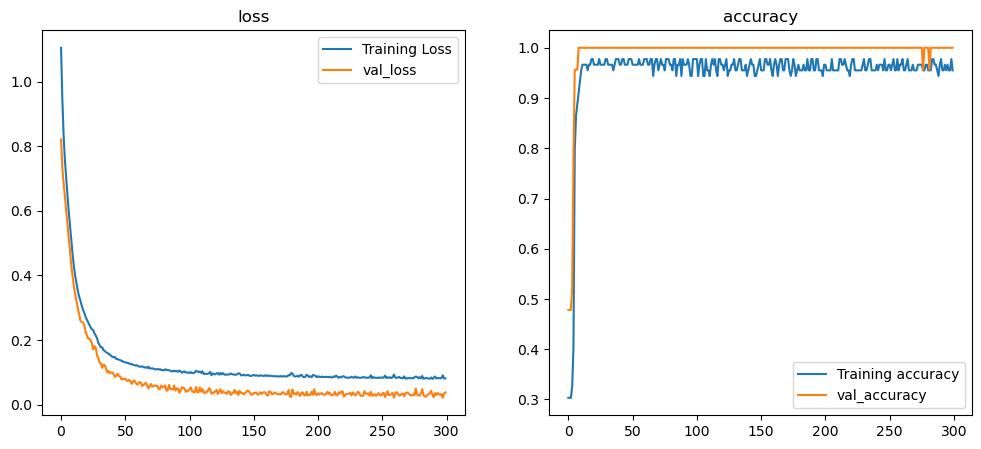

2/2 [==============================] - 0s 6ms/step - loss: 0.0818 - accuracy: 0.9737
Test Loss: 0.08180315792560577 , Test acc : 0.9736841917037964


In [10]:

#데이터 로드 및 전처리 아이리스 데이터 로드 , 특성값 레이블 분리 , 레이블원핫 인코딩 . 홀드아웃
iris = load_iris() 
x,y= iris.data,iris.target.reshape(-1,1)

#print(x.shape)
#print(y.shape)

encoder = OneHotEncoder(sparse =False)
y_onehot = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y_onehot, random_state=42)

#모델 생성 : 순차모델 -> 조건에 해당하는 레이어
model =  Sequential([Dense(8,input_dim=4 , activation='relu' , name ='dense_1'),
                     #Dropout(0.2 , name ='dropout_1'),
                     Dense(8, activation='relu', name ='dense_2') ,
                     #Dropout(0.2, name ='dropout_2'),
                     Dense(3, activation='softmax', name ='dense_output')
                    ])

#모델 컴파일 : 최적화,손실, 평가지표 설정
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 


#모델 학습 : 모델에 훈련데이터 학습 , 검증 데이터를 사용해서 에폭마다 모델 성능평가
history = model.fit(X_train,y_train,epochs= 300 , batch_size=10,validation_split=0.2) 


#학습 결과 및 평가 : 테스트 데이터를 사용해서 모델 성능을 평가 , 학습과정에서의 손실 및 정확도 변화도
#history.history['accuracy']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('accuracy')
plt.show()

#모델평가
loss, acc = model.evaluate(X_test,y_test)
print(f'Test Loss: {loss} , Test acc : {acc}')

In [11]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_output (Dense)        (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

<a src = 'https://www.tensorflow.org/api_docs/python/tf/keras/Sequential'>

In [12]:
#case 1 : 입력형태 지정하면서 모델 구축 -> 가중치 초기화
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))


#case 2 : 초기입력 지정을 생략한 모델 구성 : fit,evaluate,predict 호출은 가능 -> 가중치 생성되지 않는다
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
# model.weights not created yet

#case 3 : 초기입력 지정을 생략한 모델 구성 : 가중치 초기화 및 가중치 개수를 리턴
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(4))
len(model.weights) #Dense층 하나당 가중치 배열과 편향 배열
# Returns "2"  [가중치 배열][편향배열]

#case 4 : build() 모델을 수동으로 구축 :  모델 상속해서 수동으로 구축및 사용할 때 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8)) # returns "2" [가중치 배열][편향배열]
model.add(tf.keras.layers.Dense(4)) # returns "2" [가중치 배열][편향배열]
model.build((None, 16)) # 입력차원을 16개로 지정
len(model.weights)
# Returns "4"

#case 5 : fit() 호출하면서 x값으로 가중치가 초기화 된다. 지연 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='sgd', loss='mse')
# This builds the model for the first time:
model.fit(x, y, batch_size=32, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 2ms/step - loss: 2.6713
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.3154
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.2076
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1298
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0982
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0822
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0809
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0715
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0769
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0678


### Q9) case5 fit 호출하면서 x값으로 가중치가 초기화 되는 구문을 확인해보자

In [13]:
#dummy data 생성
x_train = np.random.random((1000,20))
y_train = np.random.randint(2, size=(1000,1)) 

model = tf.keras.Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 
history = model.fit(X_train,y_train,epochs= 10 , batch_size=10,validation_split=0.2)

Epoch 1/10


C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


9/9 [==============================] - 1s 35ms/step - loss: 0.0000e+00 - accuracy: 0.5393 - val_loss: 0.0000e+00 - val_accuracy: 0.4348
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5393 - val_loss: 0.0000e+00 - val_accuracy: 0.4348
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5393 - val_loss: 0.0000e+00 - val_accuracy: 0.4348
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5393 - val_loss: 0.0000e+00 - val_accuracy: 0.4348
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5393 - val_loss: 0.0000e+00 - val_accuracy: 0.4348
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5393 - val_loss: 0.0000e+00 - val_accuracy: 0.4348
Epoch 7/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5393 - val_loss: 0.0000e+00 - val_accur

In [14]:
#model.weights[0]

In [15]:
print(len(model.weights))

4


In [16]:
for layer in model.layers:
     layer_info = [
      f'layer.name:  {layer.name}',
      f"Input Shape: {getattr(layer,'input_shape','N/A')}",
      f"output Shape:{getattr(layer,'output_shape','N/A')}",
      f"Activation: {getattr(layer.activation,'__name','N/A') if hasattr(layer,'activation') else 'N/A'}",
     ]
     print(' ||| '.join(layer_info))

layer.name:  dense_15 ||| Input Shape: (None, 4) ||| output Shape:(None, 64) ||| Activation: N/A
layer.name:  dense_16 ||| Input Shape: (None, 64) ||| output Shape:(None, 1) ||| Activation: N/A


### 히든레이어 추가 할때 ?  model.add(Dense(1,activation = 'sigmoid'))
1) Dense 레이어 사용하자
2) activation 매개변수를 통해 활성화 함수를 지정한다
활성화함수는 레이어 출력에 비선형성을 추가해서 모델의 복잡한 문제를 학습하도록 도와 준다.

<<출력 레이어 설정>>  
case 1 이진 분류 : sigmoid가 0,1 사이로 압축하여 한 클래스에 대한 확률을 나타낸다  
case 2 다중클래스 분류 : softmax 모든 출력 노드의 합이 1이 되도록 각 노드의 출력값을 확률로 변환
case 3 회귀 분류 : linear 하나의 연속적인 값을 예측

In [17]:
#case 3 회귀 분류 : linear 하나의 연속적인 값을 예측
model = tf.keras.Sequential()
model.add(Dense(64,input_dim=10,activation='relu'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                704       
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#case 2 다중클래스 분류 : 가중치의 수 = 입력차원 * 뉴런 수 , 뉴런수만큼 편향이 추가된다
# 각 레이어의 파라미터 수 = 가중치(입력차원*뉴런수) + 편향
model = tf.keras.Sequential()
model.add(Dense(64,input_dim=10,activation='relu')) # (10*64) + 64
model.add(Dense(32,activation='relu')) # 64*32 + 32
model.add(Dense(3,activation='softmax')) # 32*3 +3 
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                704       
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2883 (11.26 KB)
Trainable params: 2883 (11.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
